In [14]:
# Importing the necessary libraries 

import pandas as pd

import tensorflow as tf 
from tensorflow import keras 

from keras.layers import Dense, Flatten, Input 
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16

from glob import glob 

# Visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [11]:
# Checking the version of tensorflow

tf.__version__

'2.8.2'

In [2]:
# Declaring the standard image size 

image_size = [224,224]

In [4]:
# Specifying the path of dataset

train_path = "/content/drive/MyDrive/chest_xray/train"

test_path = "/content/drive/MyDrive/chest_xray/test"

In [7]:
# Loading the VGG16 model 

model = VGG16(input_shape = image_size+[3], weights="imagenet", include_top=False)

In [12]:
# Setting the trainable to False for all the layers in the model to stick with the vgg16 pretrained weights 


for layers in model.layers:
  layers.trainable = False

In [17]:
# Let us store the number of output classes in a variable 

class_count = glob(train_path+"/*")

print(len(class_count),"is the number of classes to be classified")

2 is the number of classes to be classified


In [28]:
# Flattening the output layer to add a fully connected layer to the model 

fc_layer = Flatten()(model.output)

# Adding a final fully connected layer 

fc_layer_2 = Flatten()(fc_layer)

In [29]:
# Builiding the final layer / output layer for the model 

prediction_layer = Dense(len(class_count), activation="softmax")(fc_layer_2)

In [30]:
# Creating the model object 

final_model = Model(inputs = model.input, outputs = prediction_layer)

In [31]:
# Visualizing the summary of the model 

final_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### The model is now built 

In [47]:
# Setting the loss function, optimizer and evaluation metric for the model 

final_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Using the ImageDataGenerator to generate images with variablility 

train_datagen =  ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   vertical_flip = True)

# For training data we only rescale the data 
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
# Importing training set  

training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224),batch_size=16, class_mode="categorical")

Found 5226 images belonging to 2 classes.


In [45]:
test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224),batch_size=16,class_mode="categorical")

Found 624 images belonging to 2 classes.


In [56]:
# Calling the fit on final model and passign the data and other values as arguments to train the model 

history = final_model.fit(training_set, validation_data = test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps= len(test_set))

Epoch 1/20
327/327 [==============================] - 134s 409ms/step - loss: 0.1251 - accuracy: 0.9635 - val_loss: 0.4438 - val_accuracy: 0.9119
Epoch 2/20
327/327 [==============================] - 127s 389ms/step - loss: 0.1280 - accuracy: 0.9602 - val_loss: 0.4545 - val_accuracy: 0.9054
Epoch 3/20
327/327 [==============================] - 127s 387ms/step - loss: 0.1082 - accuracy: 0.9682 - val_loss: 0.6497 - val_accuracy: 0.8878
Epoch 4/20
327/327 [==============================] - 130s 397ms/step - loss: 0.0998 - accuracy: 0.9679 - val_loss: 0.4981 - val_accuracy: 0.8798
Epoch 5/20
327/327 [==============================] - 128s 392ms/step - loss: 0.1305 - accuracy: 0.9602 - val_loss: 0.5209 - val_accuracy: 0.9038
Epoch 6/20
327/327 [==============================] - 126s 385ms/step - loss: 0.1482 - accuracy: 0.9621 - val_loss: 1.2490 - val_accuracy: 0.8157
Epoch 7/20
327/327 [==============================] - 127s 388ms/step - loss: 0.1240 - accuracy: 0.9654 - val_loss: 0.7309 -

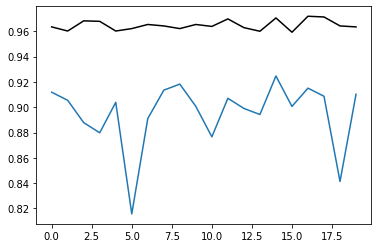

In [57]:
plt.plot(history.history['accuracy'], color="black")
plt.plot(history.history['val_accuracy'])

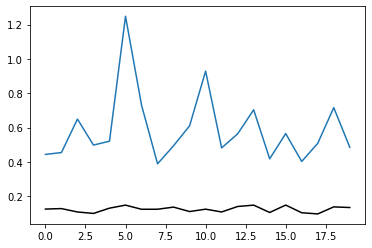

In [58]:
plt.plot(history.history['loss'], color="black")
plt.plot(history.history['val_loss'])

In [59]:
final_model.save("pneumonia_model.h5")